In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(1)

In [8]:
#read in the dataset (select 2015)
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
shape = df.shape
print(f"This Data Frame have {shape[0]} rows and {shape[1]} columns")

This Data Frame have 253680 rows and 22 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
#check missing value
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [13]:
#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [14]:
#Drop Missing Values - knocks 100,000 rows out right awa
df=df.dropna()
df.shape

(253680, 22)

In [15]:
#Check how many respondents have no diabetes, prediabetes or diabetes. Note the class imbalance!
df.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64

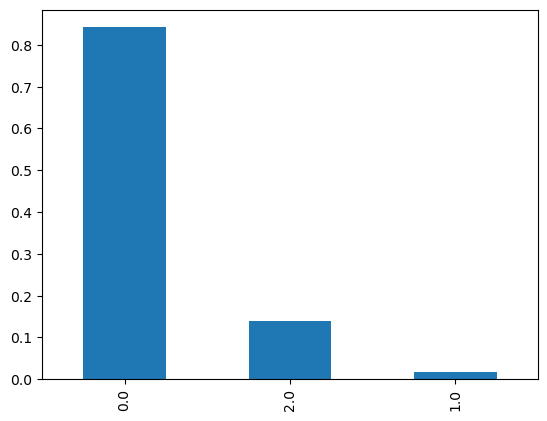

In [16]:
df['Diabetes_012'].value_counts(normalize=True).plot(kind='bar');
#0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes

we observe that less than 20% of the patient are with diabetes

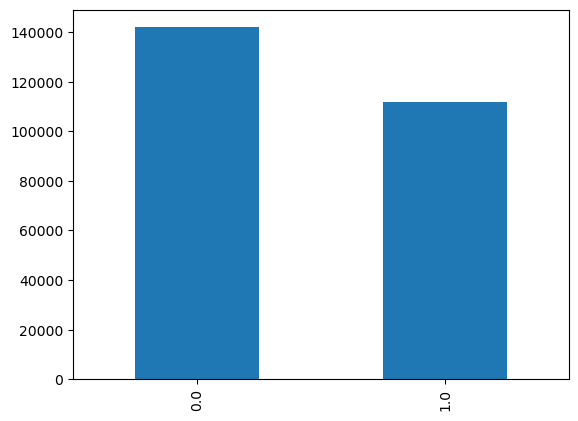

In [17]:
df['Sex'].value_counts().plot(kind='bar');
#Male is 1 and female is 0 

we have more female than male.

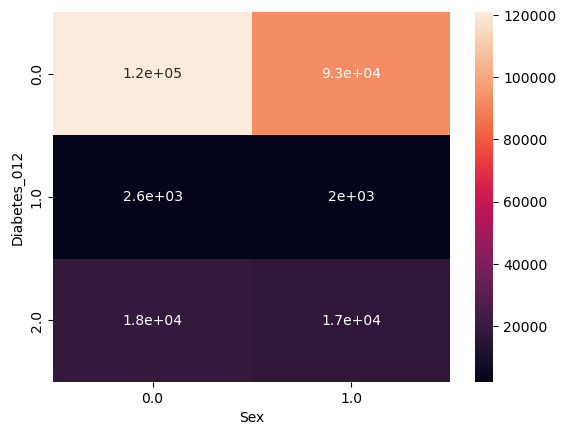

In [18]:
sns.heatmap(pd.crosstab(df['Diabetes_012'], df['Sex']), annot=True);

<AxesSubplot:>

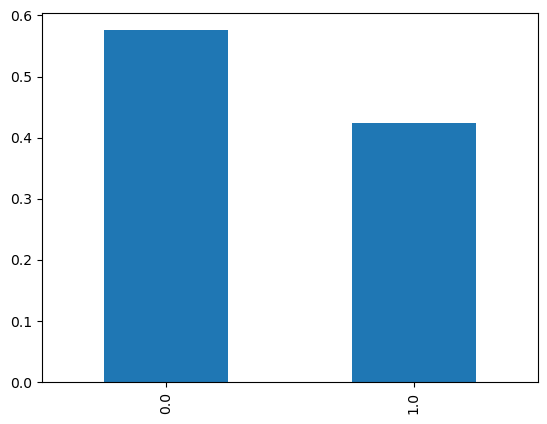

In [19]:
df['HighChol'].value_counts(normalize=True).plot(kind='bar')

About 45% of the Respondents have been told they have high cholestero

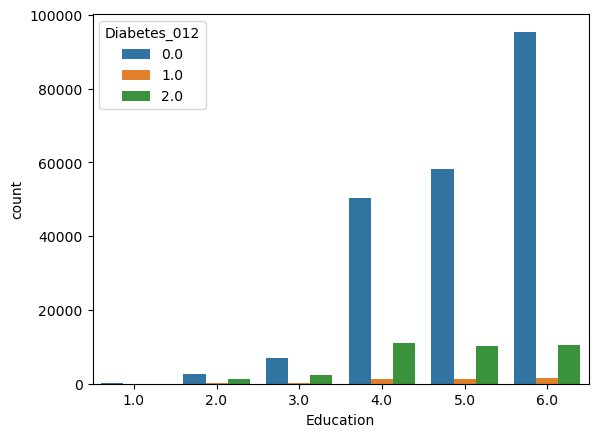

In [20]:
sns.countplot(x='Education', hue='Diabetes_012', data=df);

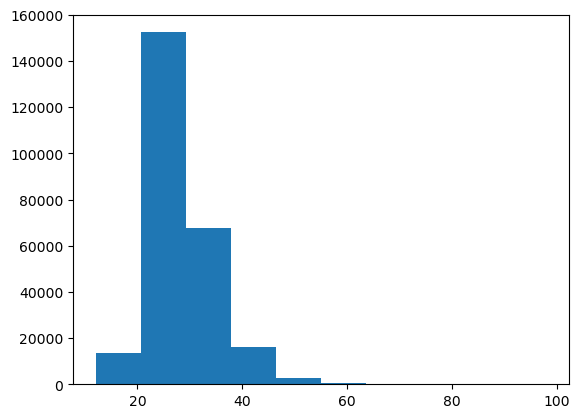

In [21]:
plt.hist(df['BMI'], bins=10);

A lot of Respondent BMI falls between the 20-30 range

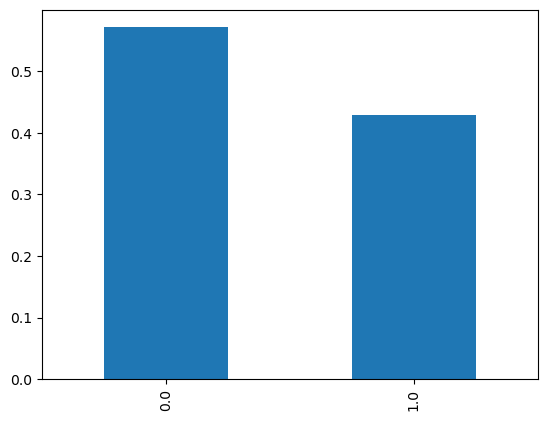

In [22]:
df['HighBP'].value_counts(normalize=True).plot(kind='bar');

About 45% of the Respondents have been told they have high blood pressure.

<AxesSubplot:>

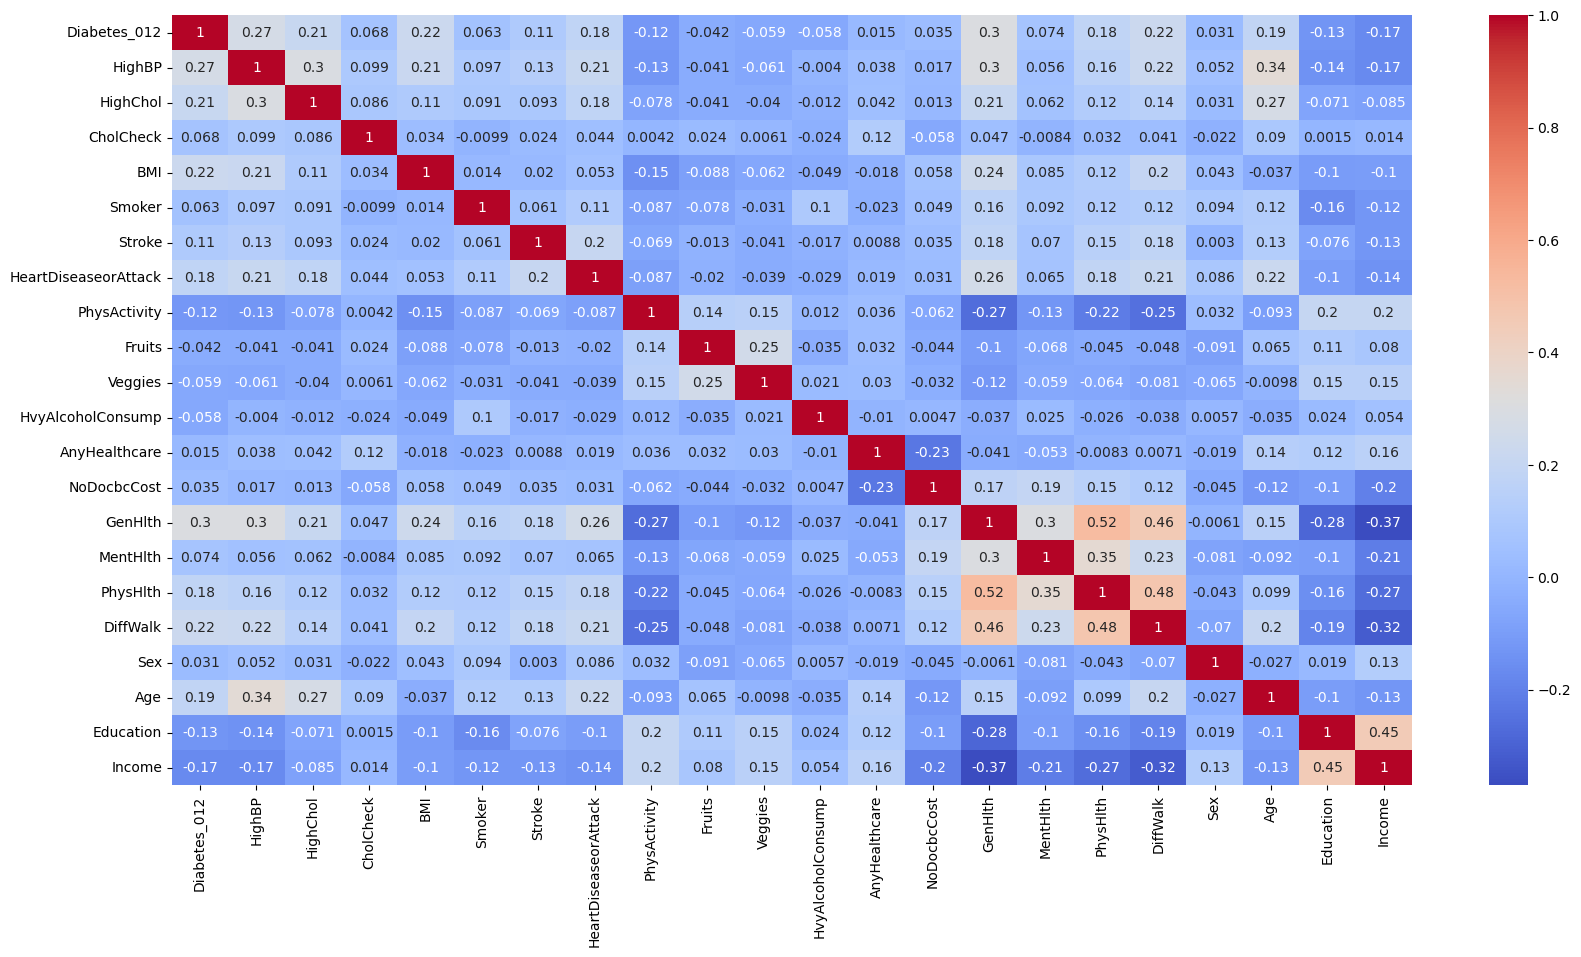

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='coolwarm' )

In [24]:
x= df.corr()

In [25]:
col = x.columns
col

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [36]:
X = df[['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI']]
y = df[["Diabetes_012"]]

In [37]:
y

,Diabetes_012
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,2.0
253677,0.0
253678,0.0


In [38]:
y["Diabetes_012"].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [42]:
diff_class = (y[y['Diabetes_012']==1].shape[0]  / y[y['Diabetes_012']==0].shape[0])*100
print(f"diabetes class is {diff_class}% of total df")

diabetes class is 2.1670261999129634% of total df


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


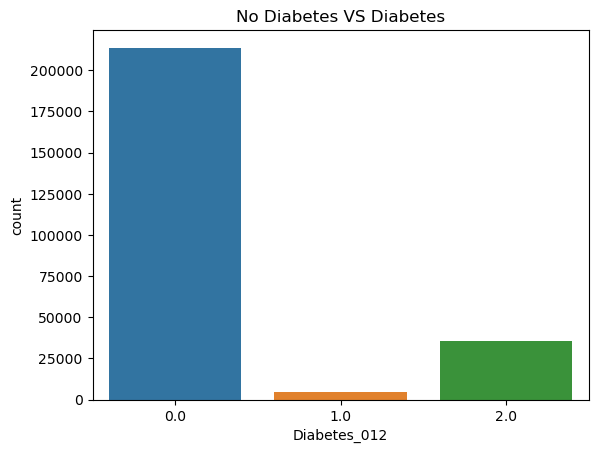

In [44]:
sns.countplot(y["Diabetes_012"])
labels = ["no diabetes", "diabetes"]
plt.title("No Diabetes VS Diabetes")
plt.show()

In [45]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [46]:
#features extraction
x = df[['HighBP', 'HighChol', 'HeartDiseaseorAttack',
       'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income', 'BMI']]
y = df['Diabetes_012']

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.3 , random_state=1)

In [48]:
logreg = LogisticRegression() 
logreg.fit(x_train, y_train) 
y_pred = logreg.predict(x_test) 
print("Accuracy={:.4f}".format(logreg.score(x_test,y_test))) 

Accuracy=0.8450


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred=logreg.predict(x_test)

print('training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('test set score: {:.4f}'.format(logreg.score(x_test, y_test)))


training set score: 0.8452
test set score: 0.8450


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.51      0.16      0.24     10652

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.80     76104



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
